In [1]:
from imageprocessor import Imageprocessor
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imageprocessor = Imageprocessor()
image = mpimg.imread("../test_images/test5.jpg")

Initializing image processor ..
Done ...


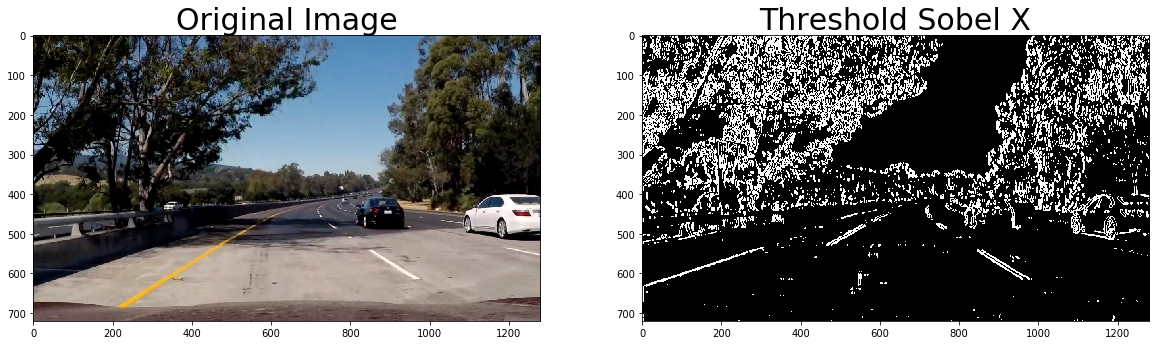

In [3]:
gradx=imageprocessor.abs_sobel_threshold(image, orient='x',sobel_kernel=15, sobel_threshold=(20, 100))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(gradx, cmap='gray')
ax12.set_title('Threshold Sobel X', fontsize=30)
plt.show()

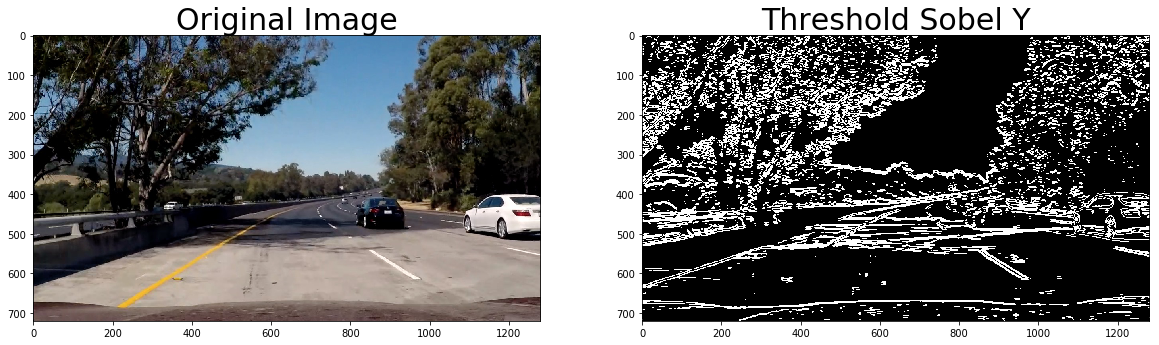

In [4]:
grady=imageprocessor.abs_sobel_threshold(image, orient='y',sobel_kernel=15, sobel_threshold=(20, 100))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(grady, cmap='gray')
ax12.set_title('Threshold Sobel Y', fontsize=30)
plt.show()

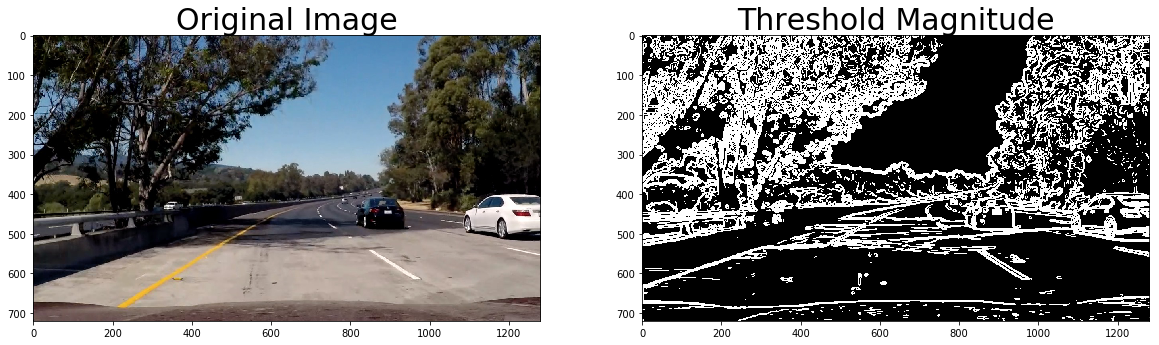

In [5]:
mag_binary=imageprocessor.magnitude_threshold(image, sobel_kernel=15, magnitude_threshold=(20, 200))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(mag_binary, cmap='gray')
ax12.set_title('Threshold Magnitude', fontsize=30)
plt.show()

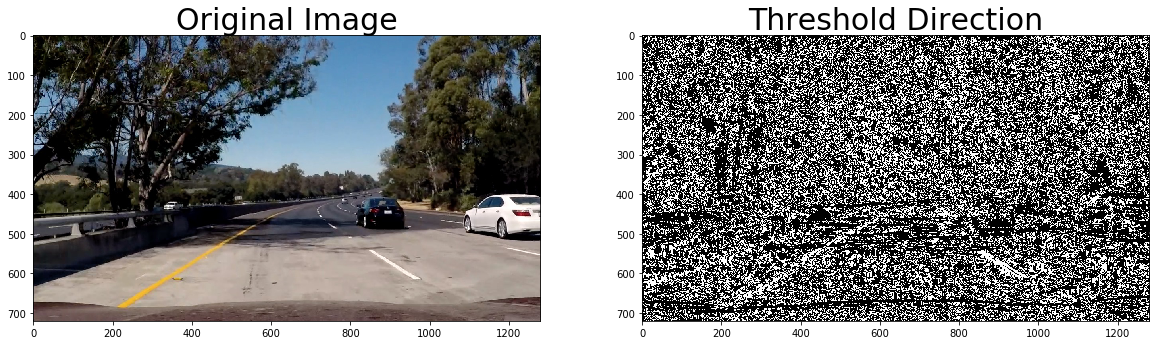

In [6]:
dir_binary=imageprocessor.direction_threshold(image, sobel_kernel=9, direction_threshold=(0.7, 1.3))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(dir_binary, cmap='gray')
ax12.set_title('Threshold Direction', fontsize=30)
plt.show()

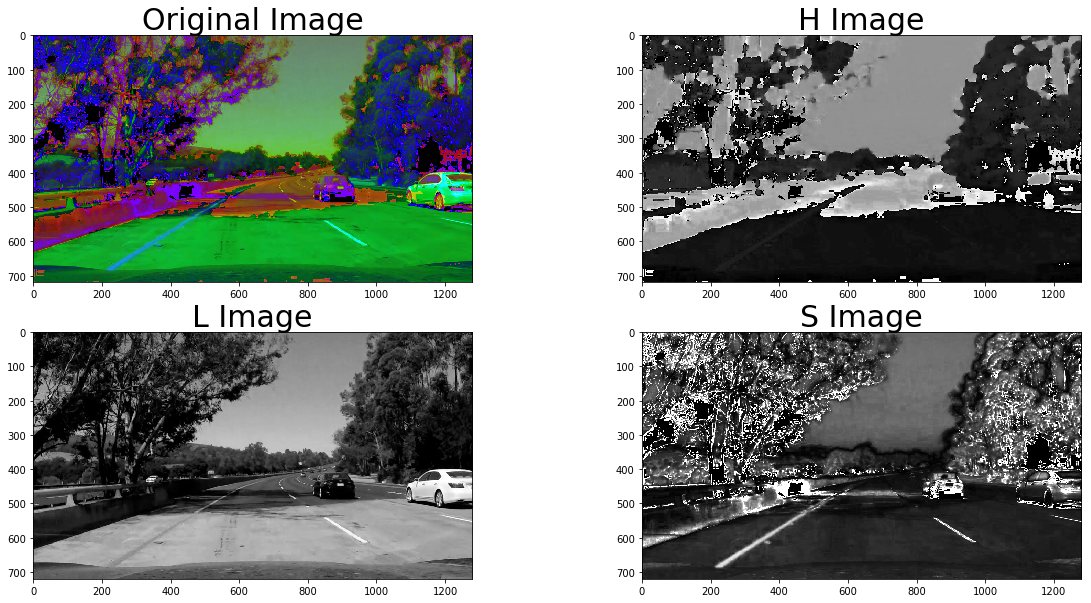

In [7]:
f, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(20,10))
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
ax11.imshow(hls)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(hls[:,:,0], cmap='gray')
ax12.set_title('H Image', fontsize=30)          
ax21.imshow(hls[:,:,1], cmap='gray')
ax21.set_title('L Image', fontsize=30)
ax22.imshow(hls[:,:,2], cmap='gray')
ax22.set_title('S Image', fontsize=30)
plt.show()

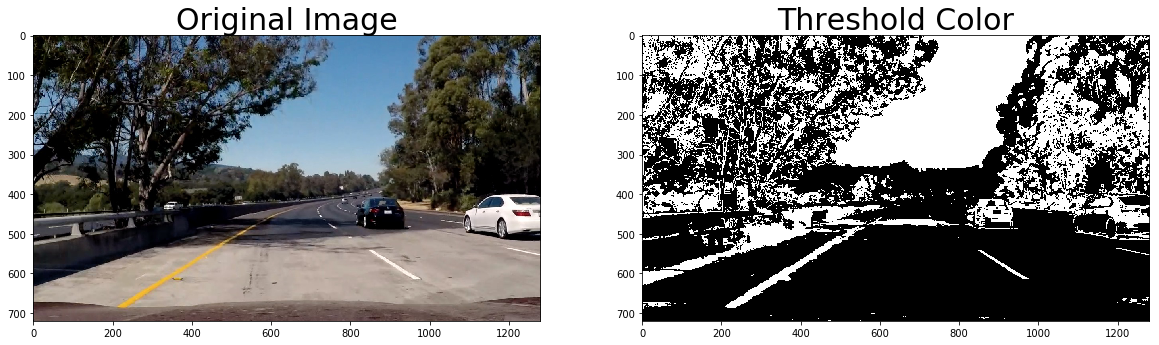

In [8]:
hls_binary=imageprocessor.hls_color_threshold(image, s_threshold=(70, 255))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(hls_binary, cmap='gray')
ax12.set_title('Threshold Color', fontsize=30)
plt.show()

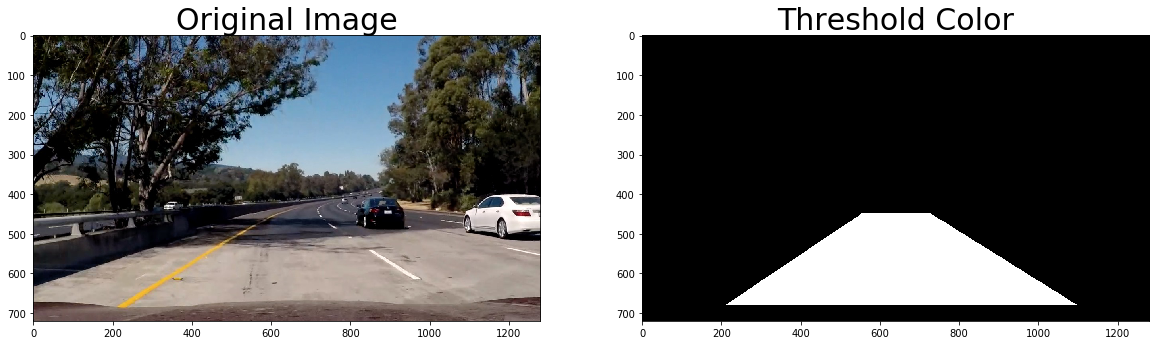

In [9]:
# REGION OF INTEREST
roi_top_left = (555,448)
roi_top_right = (725,448)
roi_bottom_left = (212, 678)
roi_bottom_right = (1094,678)
region = np.array( [[roi_top_left,roi_bottom_left,roi_bottom_right,roi_top_right]], dtype=np.int32 )
roi_binary = imageprocessor.region_of_interest(image, region)
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(roi_binary, cmap='gray')
ax12.set_title('Threshold Color', fontsize=30)
plt.show()

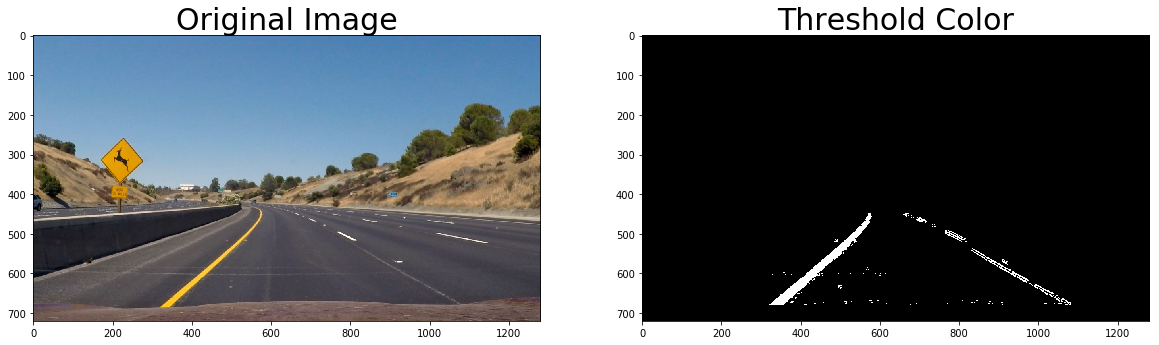

In [13]:
combined_binary = imageprocessor.combined_threshold_roi(gradx, grady, mag_binary, dir_binary, hls_binary, roi_binary)
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(combined_binary, cmap='gray')
ax12.set_title('Threshold Color', fontsize=30)
plt.show()

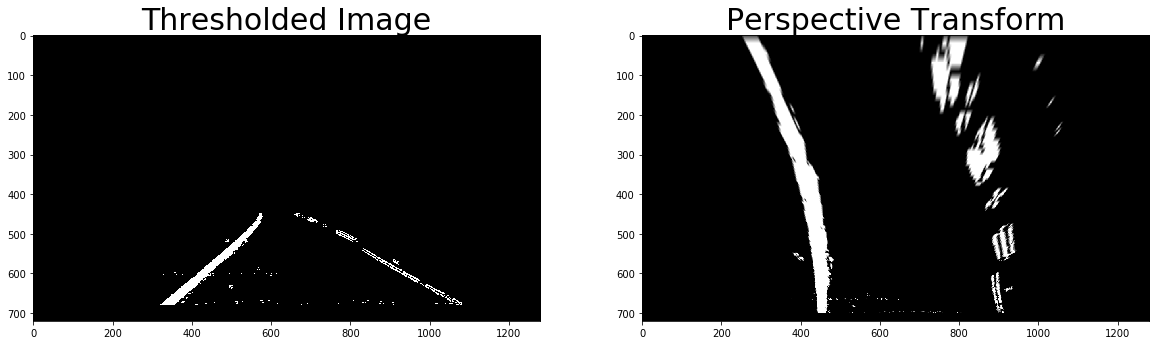

In [16]:
image_top_left = (595,448)
image_top_right = (685,448)
image_bottom_left = (252, 678)
image_bottom_right = (1054,678)

birdeye_top_left = (400,20)
birdeye_top_right = (890,20)
birdeye_bottom_left = (400, 700)
birdeye_bottom_right = (890,700)

src = np.float32([image_top_left,image_bottom_left,image_top_right,image_bottom_right])
dst = np.float32([birdeye_top_left,birdeye_bottom_left,birdeye_top_right,birdeye_bottom_right])
imageprocessor.set_perspective_transform(src,dst)

warped = imageprocessor.perspective_transform(combined_binary)
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(combined_binary, cmap='gray')
ax11.set_title('Thresholded Image', fontsize=30)
ax12.imshow(warped, cmap='gray')
ax12.set_title('Perspective Transform', fontsize=30)
plt.show()

test1.jpg


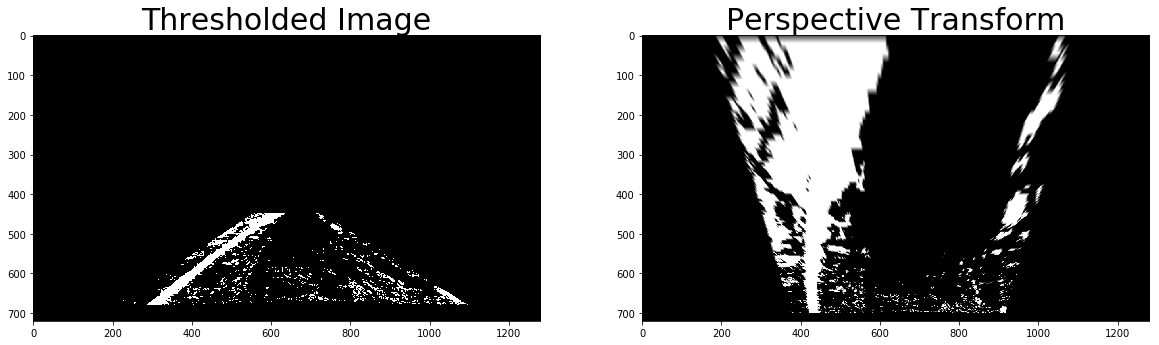

test6.jpg


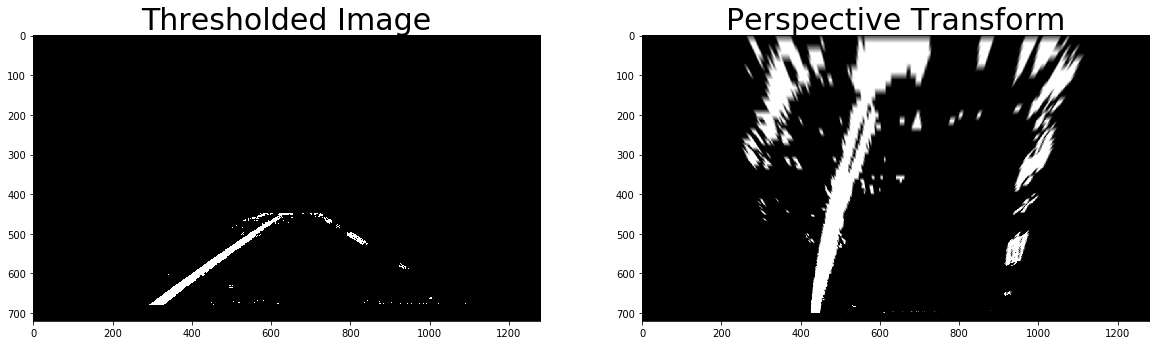

straight_lines2.jpg


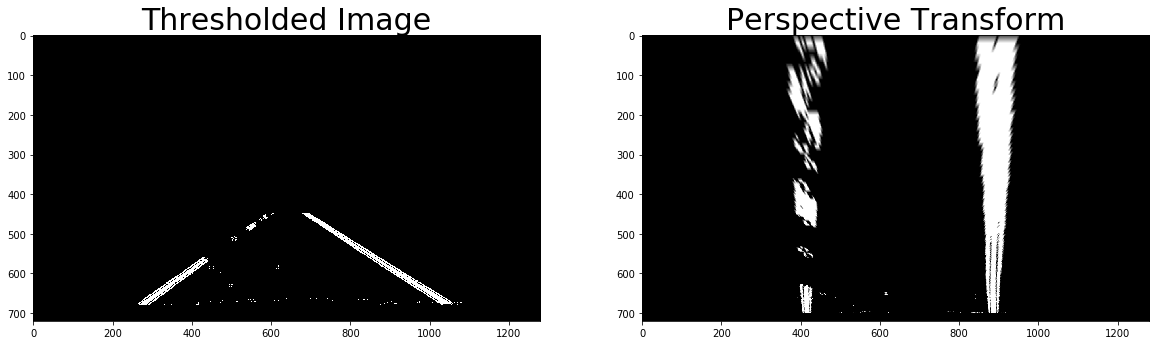

test4.jpg


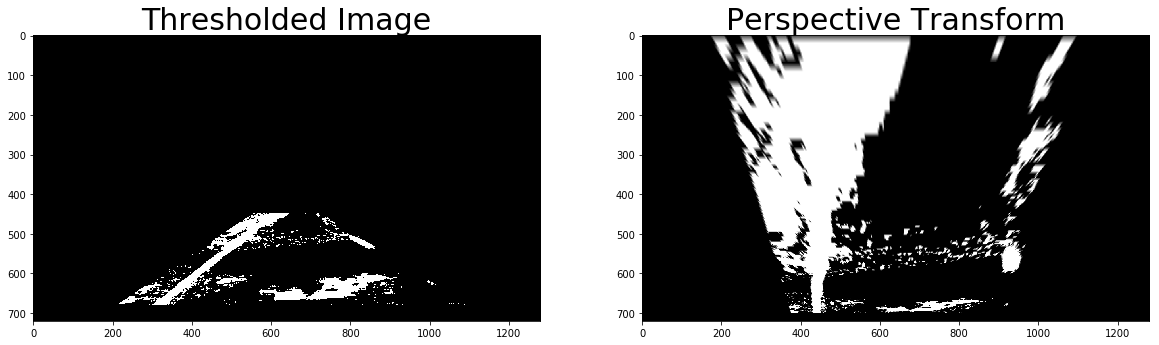

test5.jpg


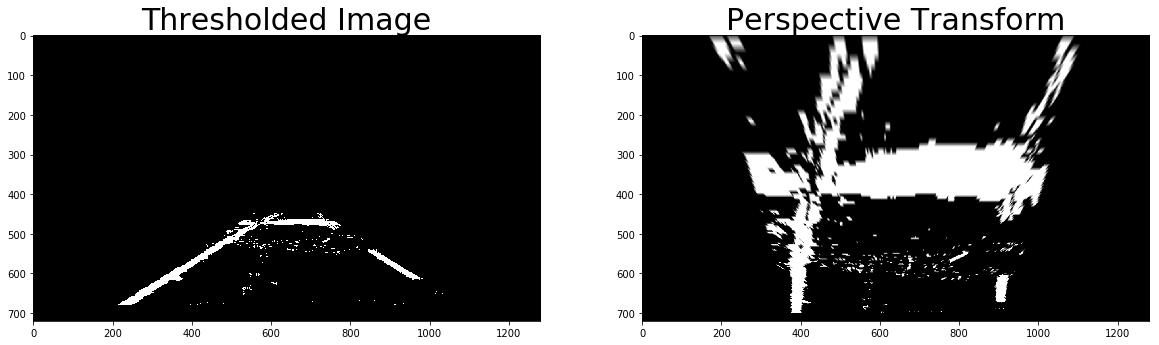

straight_lines1.jpg


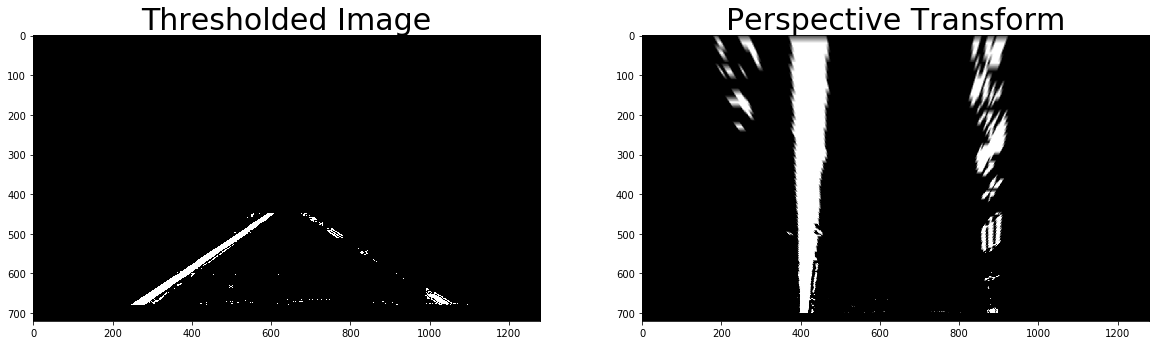

test3.jpg


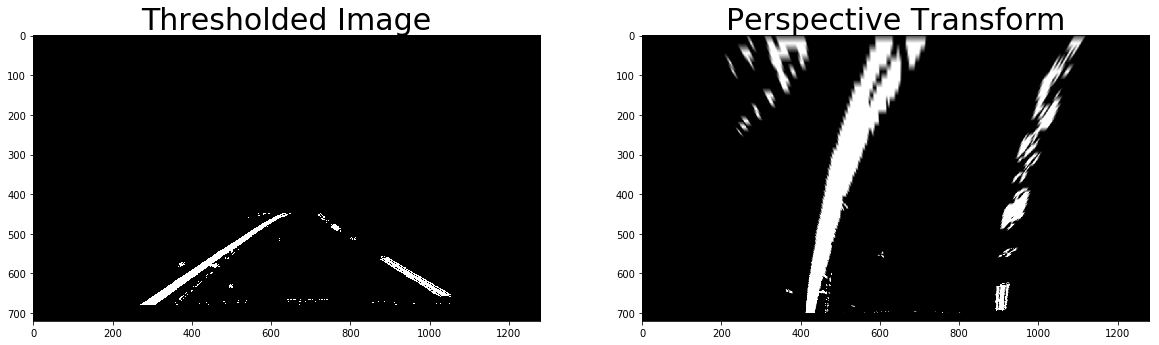

test2.jpg


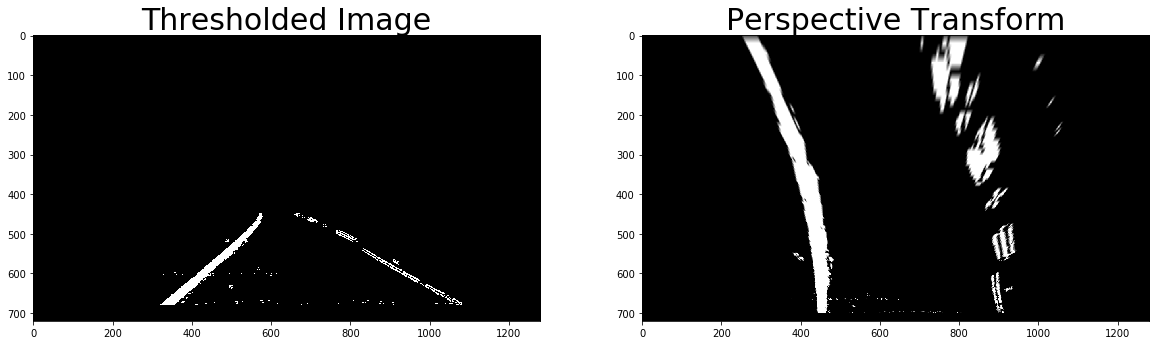

In [17]:
test_images = "../test_images/"
for image_link in os.listdir(test_images):
    print (image_link)
    image = mpimg.imread(test_images+image_link)
    gradx=imageprocessor.abs_sobel_threshold(image, orient='x',sobel_kernel=15, sobel_threshold=(20, 100))
    grady=imageprocessor.abs_sobel_threshold(image, orient='y',sobel_kernel=15, sobel_threshold=(20, 100))
    mag_binary=imageprocessor.magnitude_threshold(image, sobel_kernel=15, magnitude_threshold=(20, 200))
    dir_binary=imageprocessor.direction_threshold(image, sobel_kernel=9, direction_threshold=(0.7, 1.3))
    hls_binary=imageprocessor.hls_color_threshold(image, s_threshold=(70, 255))
    combined_binary = imageprocessor.combined_threshold_roi(gradx, grady, mag_binary, dir_binary, hls_binary, roi_binary)
    warped = imageprocessor.perspective_transform(combined_binary)
    #Plot
    f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
    ax11.imshow(combined_binary, cmap='gray')
    ax11.set_title('Thresholded Image', fontsize=30)
    ax12.imshow(warped, cmap='gray')
    ax12.set_title('Perspective Transform', fontsize=30)
    plt.show()
    